<br><br><br><br><br>

# The Scientific Python Ecosystem

<br><br><br><br><br>

<img src="img/shells-1.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-2.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-3.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-4.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<img src="img/shells-5.png" width="70%"><i>(Stolen from Jake Vanderplas.)</i>

<br><br>

<p style="font-size: 100px"><img src="img/numerical-recipes.jpg" width="25%" style="vertical-align: middle"> = <img src="img/scipy-logo.png" width="45%" style="vertical-align: middle"></p>

<br><br>

<center><img src="img/scipy-docs.png" width="65%"></center>

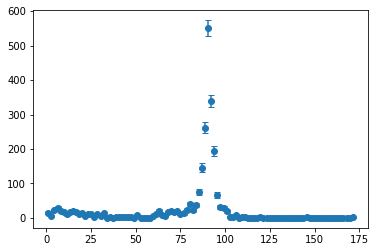

In [6]:
import uproot, numpy, matplotlib.pyplot
masses = uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"].array("M")

y, edges = numpy.histogram(masses, bins=100)
yerr = numpy.sqrt(y)

# the middle of each bin
x = (edges[1:] + edges[:-1])/2

matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

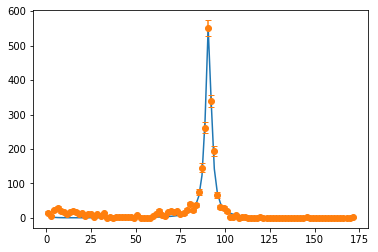

In [7]:
import scipy.stats      # for functions like "cauchy"
import scipy.optimize   # for optimizations like "curve_fit"

f = lambda x, a, b, c, d: a*scipy.stats.cauchy.pdf(x, b, c) + d/x**2

# fit f to x, y, yerr, excluding points where y and yerr are zero
parameters, errors = scipy.optimize.curve_fit(f, x[y > 0], y[y > 0], sigma=yerr[y > 0])

matplotlib.pyplot.plot(x, f(x, *parameters))
matplotlib.pyplot.errorbar(x, y, yerr, fmt="o", capsize=3);

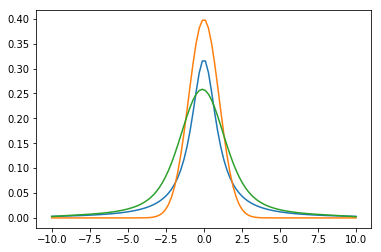

In [24]:
xs = numpy.linspace(-10, 10, 100)

# Exercise: search through the SciPy docs and figure out how to convolve two functions.
lorentzian = scipy.stats.cauchy.pdf(xs)
gaussian   = scipy.stats.norm.pdf(xs)
voigtian   = ???

matplotlib.pyplot.plot(xs, lorentzian);
matplotlib.pyplot.plot(xs, gaussian);
matplotlib.pyplot.plot(xs, voigtian);